# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [ ]:
# url_weather="http://api.openweathermap.org/data/2.5/weather?"
# url=f"{url_weather}appid={weather_api_key}&q={city}"

# response=requests.get(url)
# data=response.json()
# data

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#checking for the URL query

count_city=1
set_city=1

city_data=[]
coord_lat=[]
coord_lon=[]
main_max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
dt=[]


print(os.linesep.join(['Beginning Data Retrieval', '-----------------------------']))

for city in cities:
    
    #retrive url and request the json file
    url_weather="http://api.openweathermap.org/data/2.5/weather?"
    query_url=f"{url_weather}appid={weather_api_key}&q={city}"
    weather_response=requests.get(query_url)
    weather_json=weather_response.json()
    
    #run loop on all cities with data needed.
    try:
        
        coord_lat.append(weather_json['coord']['lat'])
        coord_lon.append(weather_json['coord']['lon'])
        main_max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])
        city_data.append(city)
        print(f"Processing Record {count_city} of set {set_city}|{city}")
    except:
         print(f'City not found. Skipping...{city}')
            
    count_city+=1
    if count_city== 51:
        count_city=0
        set_city+=1
        

print(os.linesep.join([' ----------------------------- ','Data Retrieval Complete', '-----------------------------']))

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1|kodiak
Processing Record 2 of set 1|povenets
Processing Record 3 of set 1|puerto ayora
Processing Record 4 of set 1|norman wells
Processing Record 5 of set 1|saldanha
Processing Record 6 of set 1|malakal
Processing Record 7 of set 1|qaanaaq
Processing Record 8 of set 1|bubaque
Processing Record 9 of set 1|dzerzhinsk
Processing Record 10 of set 1|vila franca do campo
Processing Record 11 of set 1|sitka
Processing Record 12 of set 1|port elizabeth
Processing Record 13 of set 1|hobart
City not found. Skipping...sentyabrskiy
Processing Record 15 of set 1|rikitea
Processing Record 16 of set 1|ngunguru
Processing Record 17 of set 1|ushuaia
Processing Record 18 of set 1|yellowknife
Processing Record 19 of set 1|los llanos de aridane
Processing Record 20 of set 1|pavino
Processing Record 21 of set 1|serenje
Processing Record 22 of set 1|hermanus
Processing Record 23 of set 1|saint george
Processing Record 24 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#!mkdir weather_CSV

city_dic={'City':city_data,
          'Lat':coord_lat,
          'lng':coord_lon,
          'Max Temp':main_max_temp,
          'Humidity':humidity,
          'Cloudiness':cloudiness,
          'Wind Speed':wind_speed,
          'Country':country,
          'Date':dt}
city_data_df=pd.DataFrame(city_dic)
city_data_df

#export the city data into .CSV
city_data_df.to_csv('weather_CSV/weather_data.csv')

#display the data frame.
city_data_df

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,271.15,40,1,10.80,US,1615446322
1,povenets,62.8487,34.8262,256.24,88,0,1.89,RU,1615446323
2,puerto ayora,-0.7393,-90.3518,296.48,98,100,1.60,EC,1615446323
3,norman wells,65.2820,-126.8329,263.15,67,75,6.17,CA,1615446323
4,saldanha,-33.0117,17.9442,290.15,78,75,5.14,ZA,1615446323
...,...,...,...,...,...,...,...,...,...
554,betare oya,5.6000,14.0833,295.01,83,100,0.74,CM,1615446490
555,jieshi,22.8134,115.8257,298.71,67,4,6.14,CN,1615446490
556,la cruz,23.9167,-106.9000,288.15,95,94,1.49,MX,1615446491
557,rodrigues alves,-7.7380,-72.6509,293.18,97,97,0.30,BR,1615446491


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#sortting all the values under humidity 
humidity_df=city_data_df.sort_values('Humidity',ascending=False)
humidity_df
#This step needs to be skiped since there is no values over 100 under humidity.

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
103,airai,-8.9266,125.4092,292.93,100,100,0.66,TL,1615446352
35,kapaa,22.0752,-159.3190,295.37,100,90,1.54,US,1615446332
423,matagami,49.7502,-77.6328,266.15,100,90,4.63,CA,1615446449
69,talcahuano,-36.7167,-73.1167,285.15,100,20,1.54,CL,1615446342
166,chapais,49.7834,-74.8492,276.15,100,90,3.60,CA,1615446372
...,...,...,...,...,...,...,...,...,...
539,burewala,30.1667,72.6500,308.53,10,0,5.73,PK,1615446486
139,gat,31.6100,34.7642,292.04,10,30,0.45,IL,1615446243
513,bajna,27.9000,77.6833,309.76,9,0,0.05,IN,1615446476
111,goure,13.9835,10.2704,304.26,5,100,3.13,NE,1615446355


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# def imganalisys(columnX,columnY):
#     plt.scatter(city_data_df[""], city_data_df["columnY"], marker="o", s=15)
#     plt.xlabel("Latitude")
#     plt.grid(True)
#     return


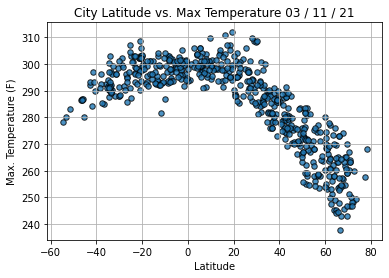

In [10]:
#!mkdir figure

#imganalisys('Lat','Max Temp')

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, s=30)
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m / %d / %y")}')
plt.ylabel("Max. Temperature (F)")

plt.grid(True)
plt.savefig("figure/plotLatitudeVsTemperaturePlot.png")

plt.show()

## Latitude vs. Humidity Plot

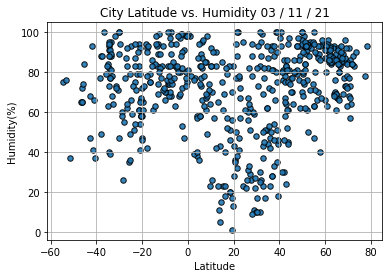

In [11]:
#imganalisys('Lat','Humidity')
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m / %d / %y")}')
plt.ylabel("Humidity(%)")

plt.grid(True)
plt.savefig("figure/plotLatitudeVsHumidityPlot.png")

plt.show()

## Latitude vs. Cloudiness Plot

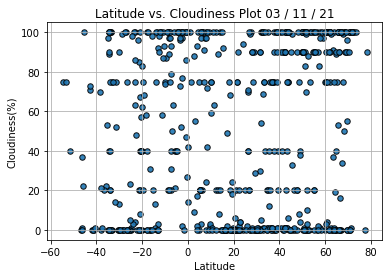

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)

plt.title(f'Latitude vs. Cloudiness Plot {time.strftime("%m / %d / %y")}')
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsCloudinessPlot.png")

plt.show()

## Latitude vs. Wind Speed Plot

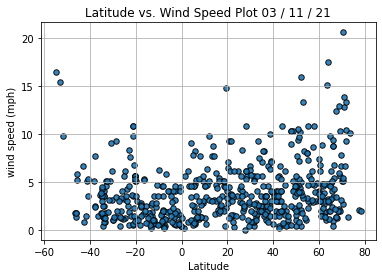

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)

plt.title(f'Latitude vs. Wind Speed Plot {time.strftime("%m / %d / %y")}')
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsWindSpeedPlot.png")

plt.show()

## Linear Regression

In [14]:
#northen lat will provided all cities over the Ecuador line.
nh_df=city_data_df.loc[city_data_df["Lat"]>0.0]
#nh_df
mtN_df=nh_df.sort_values('Max Temp',ascending=False)
mtN_df.reset_index(inplace=True)
mtN_df


,index,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,43,allapalli,19.4167,80.0667,311.96,17,0,2.30,IN,1615446335
1,495,pyapon,16.2833,95.6833,310.83,18,0,3.21,MM,1615446471
2,513,bajna,27.9000,77.6833,309.76,9,0,0.05,IN,1615446476
3,5,malakal,9.5334,31.6605,309.71,23,2,2.83,SS,1615446324
4,381,amroha,28.9167,78.4667,308.62,11,0,1.08,IN,1615446437
...,...,...,...,...,...,...,...,...,...,...
373,526,staryy nadym,65.6118,72.6842,244.43,84,53,2.43,RU,1615446482
374,340,nome,64.5011,-165.4064,244.15,69,40,1.15,US,1615446425
375,352,yar-sale,66.8333,70.8333,242.90,85,0,4.28,RU,1615446428
376,187,talnakh,69.4865,88.3972,242.85,84,96,3.17,RU,1615446378


In [15]:
#Southern lat will provided all cities under the Ecuador line.
sh_df=city_data_df.loc[city_data_df["Lat"]<0.0]
#sh_df
mt_df=sh_df.sort_values('Max Temp',ascending=False)
mt_df.reset_index(inplace=True)
mt_df

,index,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,549,roebourne,-20.7833,117.1333,308.77,41,8,6.75,AU,1615446489
1,441,yulara,-25.2406,130.9889,307.15,36,23,5.66,AU,1615446455
2,140,port hedland,-20.3167,118.5667,306.15,66,57,5.14,AU,1615446364
3,384,amuntai,-2.4177,115.2494,305.28,53,77,1.62,ID,1615446394
4,214,beloha,-25.1667,45.0500,304.47,49,0,3.30,MG,1615446386
...,...,...,...,...,...,...,...,...,...,...
176,116,rio gallegos,-51.6226,-69.2181,283.15,37,40,9.77,AR,1615446357
177,130,san jeronimo,-11.9472,-75.2829,281.50,77,100,0.74,PE,1615446361
178,236,coihaique,-45.5752,-72.0662,280.34,84,100,5.19,CL,1615446392
179,52,punta arenas,-53.1500,-70.9167,280.15,76,75,15.43,CL,1615446337


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8011314835173986


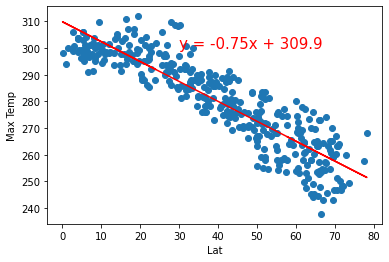

In [16]:
x_values = nh_df['Lat']
y_values = nh_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,300),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2697437824533196


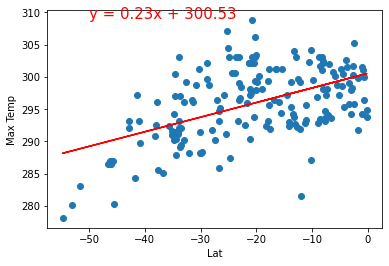

In [17]:
x_values = sh_df['Lat']
y_values = sh_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,309),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSothernHemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14007161899437204


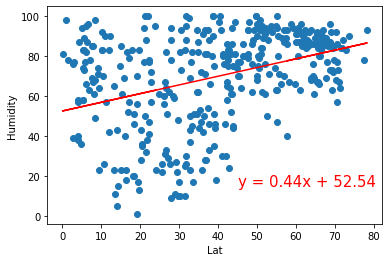

In [18]:
x_values = nh_df['Lat']
y_values = nh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphereHumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05125375132261105


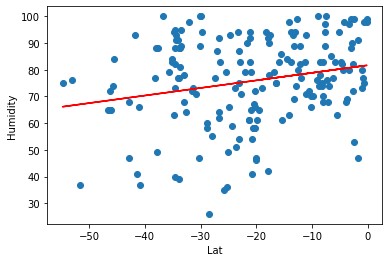

In [19]:
x_values = sh_df['Lat']
y_values = sh_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSouthernHemisphereHumidityS.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.040025385604632646


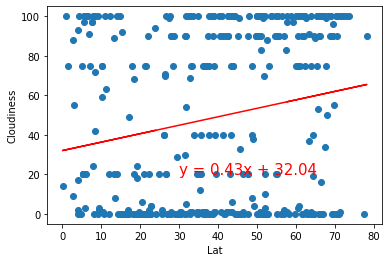

In [20]:
x_values = nh_df['Lat']
y_values = nh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphereCloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09376631346669555


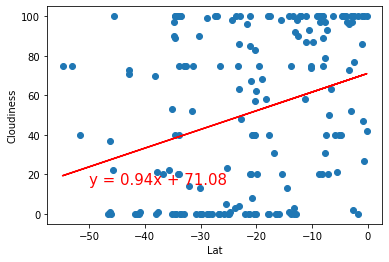

In [21]:
x_values = sh_df['Lat']
y_values = sh_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSothernHemisphereCloudinessS.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.039610528058788425


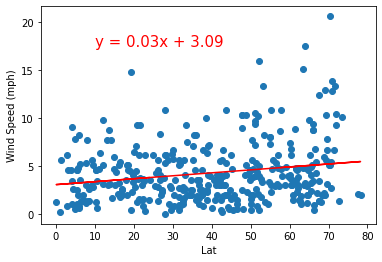

In [22]:
x_values = nh_df['Lat']
y_values = nh_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,17.5),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotNorthenHemisphereWS.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12372084673179544


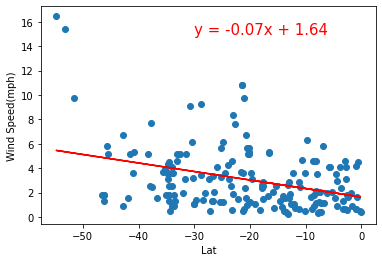

In [23]:
x_values = sh_df['Lat']
y_values = sh_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("figure/plotSothernHemisphereWSS.png")
plt.show()